In [3]:
from builtins import range
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.feature_extraction.text import TfidfVectorizer






In [4]:
url_finder=re.compile(r"(?:\@|https?\://)\S+")

In [5]:
def filter_tweets(s):
    s =s.lower()
    s=url_finder.sub("",s)
    return s

    

In [6]:
df=pd.read_csv('tweets.csv')

In [7]:
stopwords=['the','about','an','and','are','at','be','can','for','from','if','in','is','it','of','on','or','that','this','to','you','your','with']

In [8]:
text=df.text.tolist()
text=[filter_tweets(s) for s in text]
tfidf=TfidfVectorizer(max_features=100,stop_words=stopwords)
X=tfidf.fit_transform(text).todense()


In [9]:
N=X.shape[0]
idx=np.random.choice(N,size=2000,replace=False)
x=X[idx]
labels=df.handle[idx].tolist()
pTrump = sum(1.0 if e == 'realDonaldTrump' else 0.0 for e in labels) /len(labels)


proportion @realDonaldTrump: 0.503
proportion @HillaryClinton: 0.497


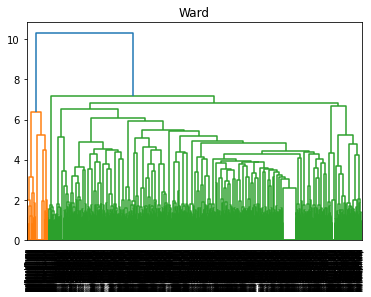

In [10]:
print("proportion @realDonaldTrump: %.3f" % pTrump)
print("proportion @HillaryClinton: %.3f" % (1- pTrump))
dist_array=pdist(x)
Z=linkage(dist_array,'ward')
plt.title("Ward")
dendrogram(Z, labels=labels)
plt.show()

In [11]:
Y=np.array([1 if e == 'realDonaldTrump' else 2 for e in labels])
C=fcluster(Z,9,criterion='distance')
categories= set(C)
print("values in C:", categories)
def purity(true_labels,cluster_assignments, categories):
  N= len(true_labels)

  total = 0.0
  for k in categories:
    max_intersection= 0
    for j in categories:
     intersection=((cluster_assignments==k)&(true_labels==j)).sum()
     if intersection>max_intersection:
        max_intersection=intersection
    total+=max_intersection
  return total/N
print("purity:",purity(Y,C,categories))

values in C: {1, 2}
purity: 0.554


In [12]:
if(C==1).sum()<(C==2).sum():
    d=1
    h=2
else:
    d=2
    h=1
    
actually_donald=((C==d)&(Y==1)).sum()
donald_cluster_size=(C==d).sum()
print("purity of @realDonaldTrump cluster:", float(actually_donald) / donald_cluster_size)
actually_hillary=((C==h)&(Y==2)).sum()
hillary_cluster_size=(C==h).sum()
print("purity of @HillaryClinton cluster:", float(actually_hillary) / hillary_cluster_size)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,df.handle)
print("Classifier score:", rf.score(X,df.handle))


purity of @realDonaldTrump cluster: 0.9457364341085271
purity of @HillaryClinton cluster: 0.5269909139497595
Classifier score: 0.9553072625698324


In [13]:
w2i=tfidf.vocabulary_
d_avg=np.array(x[C==d].mean(axis=0)).flatten()


In [14]:
print(w2i.keys())

dict_keys(['who', 'will', 'make', 'last', 'donald', 'trump', 'said', 'not', 'was', 'know', 'what', 'more', 'her', 'she', 'our', 'we', 'together', 'there', 'do', 're', 'vote', 'how', 'they', 'only', 'one', 'join', 'me', 'america', 'out', 'go', 'when', 'again', 'have', 'by', 'people', 'today', 'has', 'just', 'so', 'makeamericagreatagain', 'hillary', 'clinton', 'campaign', 'time', 'first', 'american', 'great', 'thank', 'day', 'going', 'like', 'president', 'country', 'want', 'don', 'other', 'big', 'my', 'he', 'but', 'would', 'families', 'their', 'should', 'never', 'than', 'now', 'all', 'been', 'americans', 'amp', 'every', 'get', 'good', 'let', 'crooked', 'many', 'why', 'them', 'new', 'tonight', 'watch', 'win', 'as', 'his', 'up', 'us', 'need', 'much', 'no', 'here', 'back', 'him', 'women', 'see', 'very', 'am', 'ted', 'cruz', 'trump2016'])


In [15]:
d_sorted=sorted(w2i.keys(),key=lambda w:-d_avg[w2i[w]])

In [16]:
print("\nTop 10'Donald cluster' words:")
print("\n".join(d_sorted[:10]))
h_avg=np.array(x[C==h].mean(axis=0)).flatten()
h_sorted=sorted(w2i.keys(),key=lambda w:-h_avg[w2i[w]])



Top 10'Donald cluster' words:
thank
makeamericagreatagain
trump2016
new
get
great
out
will
today
hillary
